In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 10 19:59:27 2020
@author: alankar
"""
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d
from operator import itemgetter
from mayavi import mlab

In [2]:
vertices = np.loadtxt('data-verts.txt')[:,1:]
vertno = np.array(np.loadtxt('data-verts.txt')[:,0],dtype=np.int64) - 1
sorter = sorted(zip(vertno,vertices), key=itemgetter(0))
_, vertices = zip(*sorter)
vertices = np.array(vertices)

edges = np.array(np.loadtxt('data-edges.txt')[:,1:],dtype=np.int64) - 1 
edgeno = np.array(np.loadtxt('data-edges.txt')[:,0],dtype=np.int64) - 1
sorter = sorted(zip(edgeno,edges), key=itemgetter(0))
_, edges = zip(*sorter)
edges = np.array(edges, dtype=np.int64)

faces = np.array(np.abs(np.loadtxt('data-faces.txt'))[:,1:-1],dtype=np.int64) - 1
faceno = np.array(np.loadtxt('data-faces.txt')[:,0],dtype=np.int64) - 1
sorter = sorted(zip(faceno,faces), key=itemgetter(0))
_, faces = zip(*sorter)
faces = np.array(faces, dtype=np.int64)

In [3]:
connectivity = np.zeros(faces.shape, dtype=np.int64)
for i in range(faces.shape[0]):
    this_verts = []
    this_edges = faces[i]
    for j in range(3): this_verts.append(edges[this_edges[j]])
    this_verts = np.array(this_verts, dtype=np.int64).flatten()
    this_verts = np.unique(this_verts)
    connectivity[i,:] = this_verts

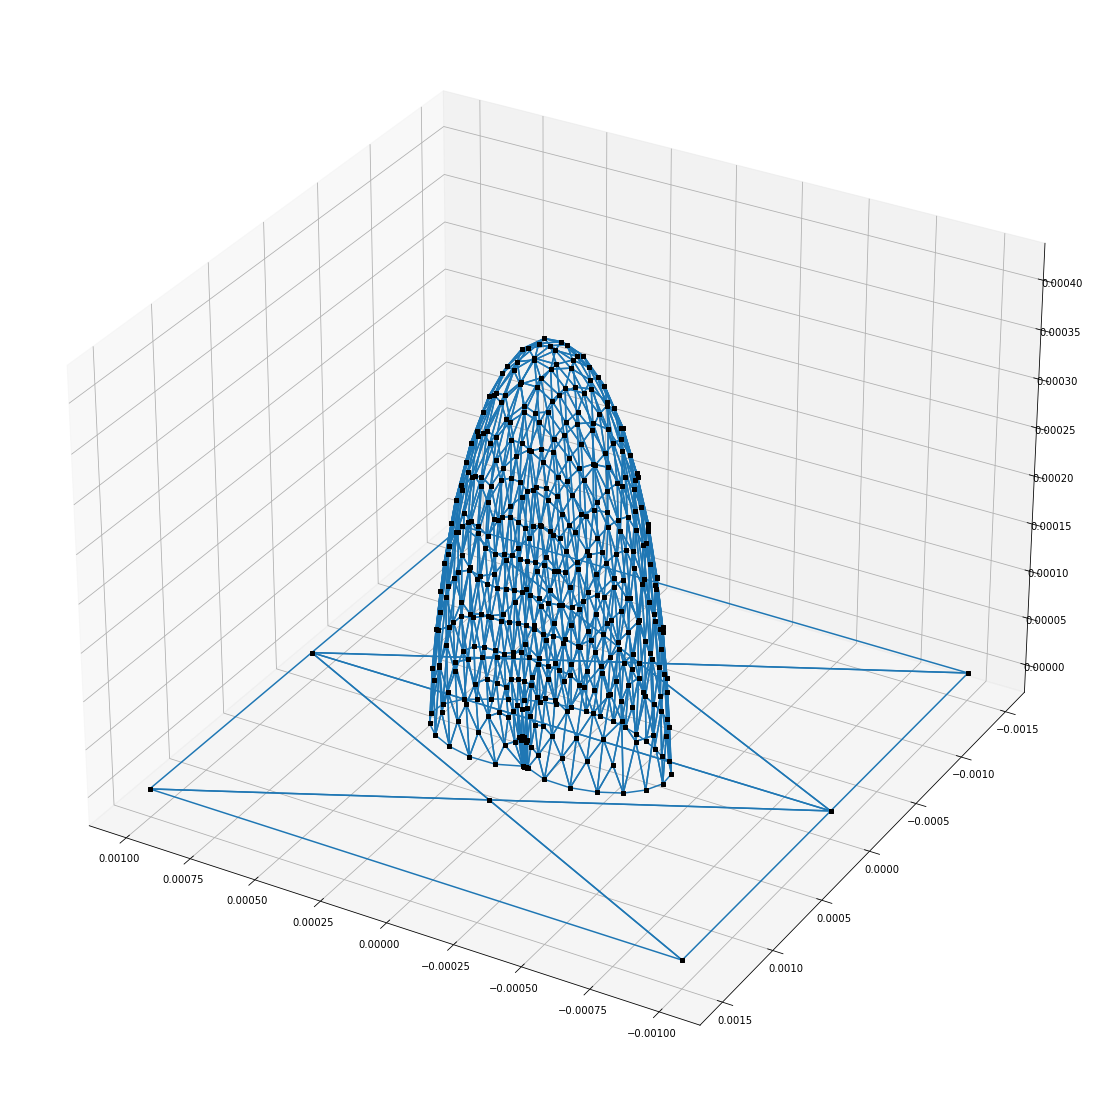

In [4]:
fig = plt.figure()
fig.set_size_inches(20,20)
ax = fig.add_subplot(111, projection='3d', aspect='auto')
ax.view_init(azim=120)

#plot the nodes
for x, y, z in vertices:
    ax.scatter(x, y, z, color='black', marker='s')

#plot the lines
for ele, con in enumerate(connectivity):
    for i in range(2):
        xs = vertices[con[i]][0], vertices[con[i+1]][0] 
        ys = vertices[con[i]][1], vertices[con[i+1]][1]
        zs = vertices[con[i]][2], vertices[con[i+1]][2]
        line = plt3d.art3d.Line3D(xs, ys, zs)
        ax.add_line(line)
    xs = vertices[con[0]][0], vertices[con[2]][0] 
    ys = vertices[con[0]][1], vertices[con[2]][1]
    zs = vertices[con[0]][2], vertices[con[2]][2]
    line = plt3d.art3d.Line3D(xs, ys, zs)
    ax.add_line(line)   
plt.show()

In [29]:
mlab.init_notebook()
f = mlab.figure(size=(1000,1000),bgcolor=(0,0,0))
field = np.sin(vertices[:, 0])**2 + np.sin(vertices[:, 1])**2
mlab.triangular_mesh(vertices[:, 0], vertices[:, 1], vertices[:, 2], connectivity, scalars=field) #colormap='bone')
#mlab.savefig('./plt-maya.png',  size=(600, 600))
#print('[[./plt-maya.png]]')

mlab.triangular_mesh(vertices[:, 0], vertices[:, 1], vertices[:, 2], connectivity, representation='wireframe')
#mlab.savefig('./plt-maya-wf.png', size=(1200, 1200))

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xe8\x00\x00\x03\xe8\x08\x02\x00\x00\x00\xc2\xc1C…

In [32]:
count = 0
for azm in range(0,360,1):
    mlab.view(azimuth=azm, elevation=65, distance=0.003)
    mlab.savefig('./anim/surf-rot_%04d.png'%count)
    count += 1

(70.0, 65.0, 0.003, array([0.        , 0.        , 0.00020365]))

In [36]:
#To animate:
#ffmpeg -r 30 -i surf-rot_%04d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p rotate.mp4
mlab.view(azimuth=70, elevation=65, distance=0.003)

(70.0, 65.0, 0.003, array([0.        , 0.        , 0.00020365]))